<a href="https://colab.research.google.com/github/wjdrnqja9/TIL/blob/main/deep_learning/3_2_TF2_Classification_%26_Adv_(2Layer_%2B_Dropout_%2B_BN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### 참고 : tensorflow.keras 공식 문서 (Official API Docs) @ https://www.tensorflow.org/api_docs/python/tf/keras

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, utils
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information

<br> 

#### 1. Prepare train & test data (MNIST)

#### Train & Test split

In [2]:
(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


#### Normalization

In [3]:
train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

#### One-hot encoding

In [4]:
train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

<br> 

#### 2. Build the model & Set the criterion

In [5]:
model = models.Sequential() 

model.add(layers.Dense(input_dim=28*28, units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=256, activation=None, kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu')) # layers.ELU or layers.LeakyReLU
model.add(layers.Dropout(rate=0.2))

model.add(layers.Dense(units=10, activation='softmax')) # 0~9 

In [6]:
model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy]) # Precision / Recall / F1-Score 적용하기 @ https://j.mp/3cf3lbi

# model.compile(optimizer='adam', 
#               loss=losses.categorical_crossentropy, 
#               metrics=['accuracy'])

<br> 

#### 3. Train the model

In [7]:
# Training 과정에서 epoch마다 활용할 validation set을 나눠줄 수 있습니다.

history = model.fit(train_data, train_label, batch_size=100, epochs=15, validation_split=0.2) 

Epoch 1/15
480/480 [==============================] - 6s 10ms/step - loss: 0.3104 - categorical_accuracy: 0.9053 - val_loss: 0.1258 - val_categorical_accuracy: 0.9618
Epoch 2/15
480/480 [==============================] - 4s 9ms/step - loss: 0.1403 - categorical_accuracy: 0.9566 - val_loss: 0.1001 - val_categorical_accuracy: 0.9693
Epoch 3/15
480/480 [==============================] - 5s 10ms/step - loss: 0.1042 - categorical_accuracy: 0.9680 - val_loss: 0.0868 - val_categorical_accuracy: 0.9718
Epoch 4/15
480/480 [==============================] - 4s 9ms/step - loss: 0.0827 - categorical_accuracy: 0.9739 - val_loss: 0.0823 - val_categorical_accuracy: 0.9746
Epoch 5/15
480/480 [==============================] - 4s 9ms/step - loss: 0.0695 - categorical_accuracy: 0.9777 - val_loss: 0.0735 - val_categorical_accuracy: 0.9785
Epoch 6/15
480/480 [==============================] - 4s 9ms/step - loss: 0.0599 - categorical_accuracy: 0.9810 - val_loss: 0.0767 - val_categorical_accuracy: 0.9775
Ep

<br> 

#### 4. Test the model

In [8]:
result = model.evaluate(test_data, test_label, batch_size=100)

print('loss (cross-entropy) :', result[0])
print('test accuracy :', result[1])

100/100 [==============================] - 0s 3ms/step - loss: 0.0630 - categorical_accuracy: 0.9839
loss (cross-entropy) : 0.06299951672554016
test accuracy : 0.9839000105857849


<br> 

#### 5. Visualize the result

In [9]:
history.history.keys()

dict_keys(['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy'])

In [11]:
len(history.history['loss'])

15

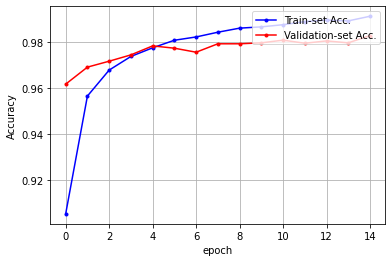

In [12]:
val_acc = history.history['val_categorical_accuracy']
acc = history.history['categorical_accuracy']

import numpy as np
import matplotlib.pyplot as plt

x_len = np.arange(len(acc))
plt.plot(x_len, acc, marker='.', c='blue', label="Train-set Acc.")
plt.plot(x_len, val_acc, marker='.', c='red', label="Validation-set Acc.")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.show()